In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [201]:
utility = 'PGE'
filepath = f"../clean_data/df_{utility}.csv"

In [202]:
df = pd.read_csv(filepath)
df.head()

,Utility,Service_City,Service_Zip,Service_County,Technology_Type,System_Size_AC,Storage_Size_kW_AC,Inverter_Size_kW_AC,Mounting_Method,App_Received_Date,Installer_Name,Third_Party_Owned,Electric_Vehicle,Total_System_Cost,Generator_Manufacturer,Inverter_Manufacturer,Generator_Quantity,Inverter_Quantity,Year
0,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,2.827,0.0,4.93,Rooftop,2018-10-17,Self-installed,No,No,12000.0,Suntech Power,Enphase,17.0,17.0,2018
1,PGE,STONYFORD,95979.0,COLUSA,Solar,6.845,0.0,6.50,Other,2018-05-20,Other,No,No,30000.0,Other,Altenergy,25.0,13.0,2018
2,PGE,DANVILLE,94506.0,CONTRA COSTA,Solar,12.651,0.0,17.64,Other,2019-08-07,Sky Power,No,No,55200.0,SunPower,SunPower,56.0,56.0,2019
3,PGE,ARROYO GRANDE,93420.0,SAN LUIS OBISPO,Solar,4.768,0.0,5.00,Rooftop,2019-07-15,Self-installed,No,Yes,20000.0,SolarWorld,SMA America,18.0,1.0,2019
4,PGE,ROCKLIN,95765.0,PLACER,Solar,2.710,0.0,2.88,Rooftop,2019-01-17,SunPower,No,No,12814.0,SunPower,SunPower,9.0,9.0,2019


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355991 entries, 0 to 355990
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Utility                 355991 non-null  object 
 1   Service_City            355991 non-null  object 
 2   Service_Zip             355991 non-null  float64
 3   Service_County          355991 non-null  object 
 4   Technology_Type         355991 non-null  object 
 5   System_Size_AC          355991 non-null  float64
 6   Storage_Size_kW_AC      355991 non-null  float64
 7   Inverter_Size_kW_AC     355991 non-null  float64
 8   Mounting_Method         355991 non-null  object 
 9   App_Received_Date       355991 non-null  object 
 10  Installer_Name          355991 non-null  object 
 11  Third_Party_Owned       355991 non-null  object 
 12  Electric_Vehicle        355991 non-null  object 
 13  Total_System_Cost       355991 non-null  float64
 14  Generator_Manufactur

# Relationships


## Electric vehicle vs total cost


<Axes: ylabel='Electric_Vehicle'>

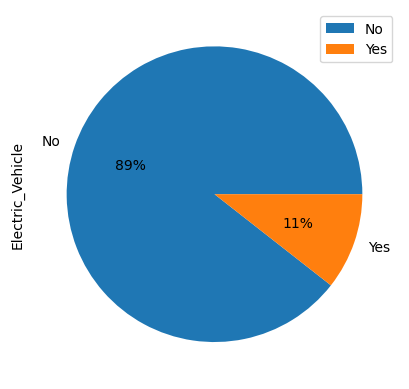

In [204]:
electric_v = df.groupby('Electric_Vehicle')['Electric_Vehicle'].count()
electric_v = electric_v.to_frame()
electric_v.plot(kind='pie', y='Electric_Vehicle', autopct='%1.f%%')

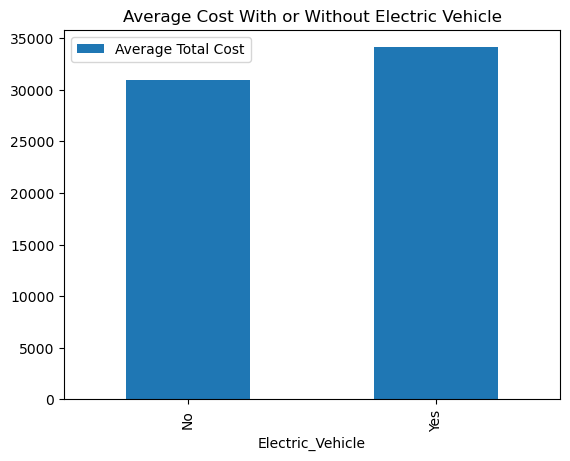

In [205]:
electric_cost = df.groupby('Electric_Vehicle')['Total_System_Cost'].mean().to_frame().reset_index()
electric_cost.head()
electric_cost.plot(kind='bar', x='Electric_Vehicle', y='Total_System_Cost' )
plt.legend(['Average Total Cost'], loc='best')
plt.title("Average Cost With or Without Electric Vehicle")
plt.show()


## Cheapest Cost by County

In [206]:
cities = list(df.Service_City.unique())
n_cities = len(cities)
counties = list(df.Service_County.unique())
n_counties = len(counties)
print(f'# of cities: {n_cities}')
print(f'# of counties: {n_counties}')

# of cities: 741
# of counties: 48


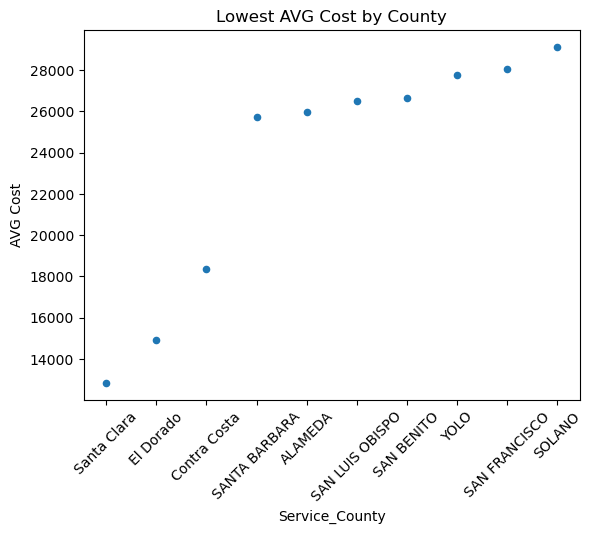

In [207]:
df_bycounties = df.groupby('Service_County')['Total_System_Cost'].mean()
df_bycounties = df_bycounties.to_frame().reset_index().sort_values(by='Total_System_Cost', ascending=True)
cheapest_counties = df_bycounties.iloc[:10]
cheapest_counties.plot.scatter(x='Service_County', y='Total_System_Cost')
plt.xticks(rotation=45)
plt.title('Lowest AVG Cost by County')
plt.ylabel('AVG Cost')
plt.show()

In [208]:
df_bycounties.head(20)

,Service_County,Total_System_Cost
41,Santa Clara,12836.000000
8,El Dorado,14922.600000
6,Contra Costa,18365.666667
32,SANTA BARBARA,25733.171431
0,ALAMEDA,25967.560663
30,SAN LUIS OBISPO,26492.066437
27,SAN BENITO,26672.797704
46,YOLO,27791.425221
28,SAN FRANCISCO,28048.253369
37,SOLANO,29135.064558


## 5 Cheapest Cities

<Axes: xlabel='Service_City'>

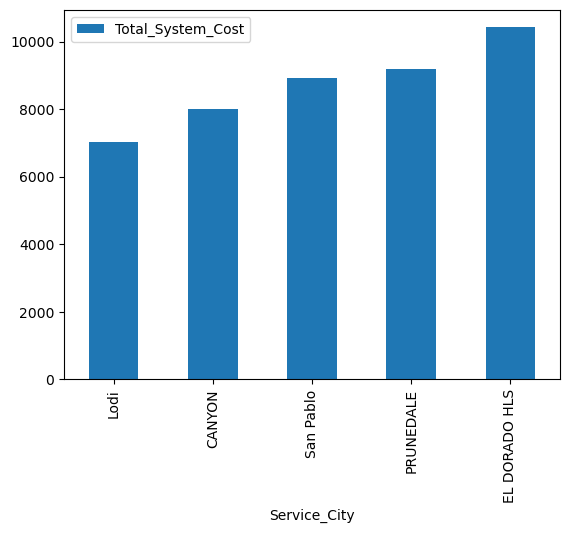

In [209]:
county=df['Service_City']
df_bycities = df.groupby('Service_City')['Total_System_Cost'].mean()
df_bycities = df_bycities.to_frame().reset_index().sort_values(by='Total_System_Cost', ascending=True)
df_bycities.columns
# df_bycounty.plot.bar(x='Service_City', y='Total_System_Cost')
df_bycities.head(10)
cheapest_five = df_bycities.iloc[:5]
cheapest_five.head()
cheapest_five.plot.bar(x='Service_City', y='Total_System_Cost')



## system size vs inverter size

<class 'pandas.core.frame.DataFrame'>
Index: 355986 entries, 0 to 355990
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Utility                 355986 non-null  object 
 1   Service_City            355986 non-null  object 
 2   Service_Zip             355986 non-null  float64
 3   Service_County          355986 non-null  object 
 4   Technology_Type         355986 non-null  object 
 5   System_Size_AC          355986 non-null  float64
 6   Storage_Size_kW_AC      355986 non-null  float64
 7   Inverter_Size_kW_AC     355986 non-null  float64
 8   Mounting_Method         355986 non-null  object 
 9   App_Received_Date       355986 non-null  object 
 10  Installer_Name          355986 non-null  object 
 11  Third_Party_Owned       355986 non-null  object 
 12  Electric_Vehicle        355986 non-null  object 
 13  Total_System_Cost       355986 non-null  float64
 14  Generator_Manufacturer  3

<Axes: xlabel='System_Size_AC'>

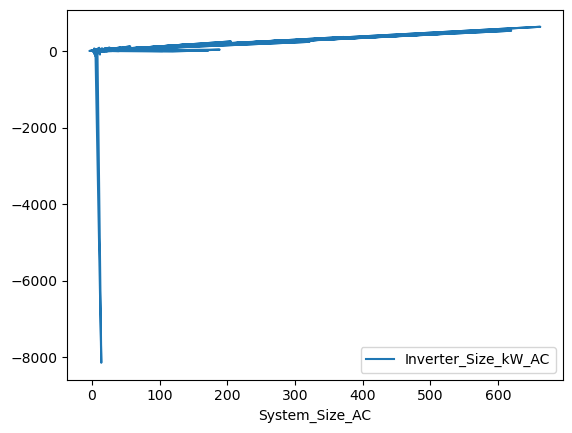

In [210]:
df_zero_plus = df.loc[(df['System_Size_AC'] > 0) | (df['Inverter_Size_kW_AC']>0)]
df_zero_plus.info()

df_zero_plus.plot(kind='line', x='System_Size_AC', y='Inverter_Size_kW_AC')

<Axes: xlabel='Inverter_Size_kW_AC'>

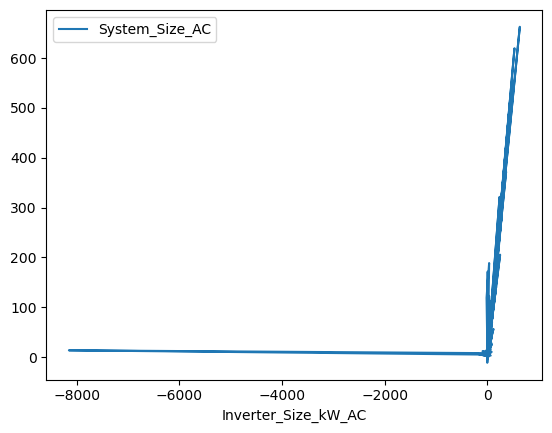

In [211]:
df.plot(kind="line", y='System_Size_AC', x='Inverter_Size_kW_AC')
    

## cost by zipcode

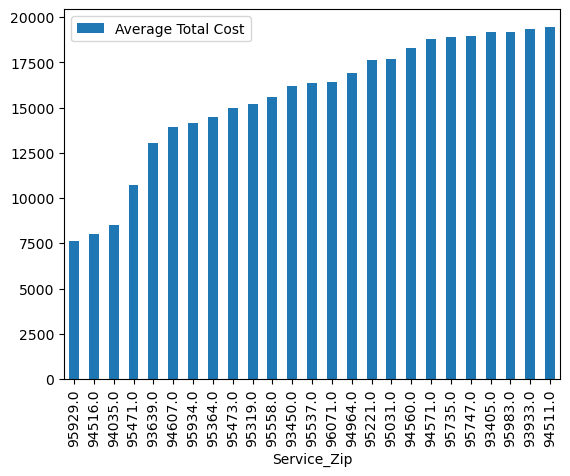

In [212]:
df_zip = df.groupby('Service_Zip')['Total_System_Cost'].mean().to_frame().reset_index().sort_values(by='Total_System_Cost').iloc[:25]
df_zip.plot(kind='bar', x='Service_Zip', y='Total_System_Cost')
plt.legend(['Average Total Cost'])


In [213]:
code = 94548.0
zip = df['Service_Zip']
zip_filtered = df.loc[zip==code]
zip_filtered.head(20)

,Utility,Service_City,Service_Zip,Service_County,Technology_Type,System_Size_AC,Storage_Size_kW_AC,Inverter_Size_kW_AC,Mounting_Method,App_Received_Date,Installer_Name,Third_Party_Owned,Electric_Vehicle,Total_System_Cost,Generator_Manufacturer,Inverter_Manufacturer,Generator_Quantity,Inverter_Quantity,Year
0,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,2.827,0.00,4.930,Rooftop,2018-10-17,Self-installed,No,No,12000.00,Suntech Power,Enphase,17.0,17.0,2018
643,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,5.881,0.00,6.160,Rooftop,2018-10-10,Self-installed,No,No,10000.00,Other,Enphase,22.0,22.0,2018
12070,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,10.059,0.00,9.450,Other,2019-06-03,Other,No,No,48729.00,SunPower,Enphase,30.0,30.0,2019
18988,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,14.991,0.00,15.232,Other,2020-05-14,Smart Energy,No,No,70000.00,Silfab,SolarEdge,56.0,2.0,2020
30031,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,13.018,0.00,11.393,Rooftop,2019-08-15,Other,No,No,46398.00,Hanwha,SolarEdge,45.0,1.0,2019
43676,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,11.190,0.00,9.600,Rooftop,2019-11-14,Other,No,No,190513.26,REC Solar,Enphase,40.0,40.0,2019
52809,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,8.705,0.00,7.616,Rooftop,2020-02-27,West Coast Solar,No,No,25000.00,Other,SolarEdge,29.0,1.0,2020
60949,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,6.530,0.00,7.616,Rooftop,2020-04-16,Other,No,No,24000.00,SolarWorld,SolarEdge,21.0,1.0,2020
79585,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,10.766,0.00,10.440,Rooftop,2020-09-09,Other,No,No,38547.00,LG,Enphase,36.0,36.0,2020
88419,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,11.521,0.00,10.730,Rooftop,2020-11-03,Sunrun,No,No,53000.28,LG,Enphase,37.0,37.0,2020


Text(0.5, 1.0, 'Total Cost vs Generator Quantity')

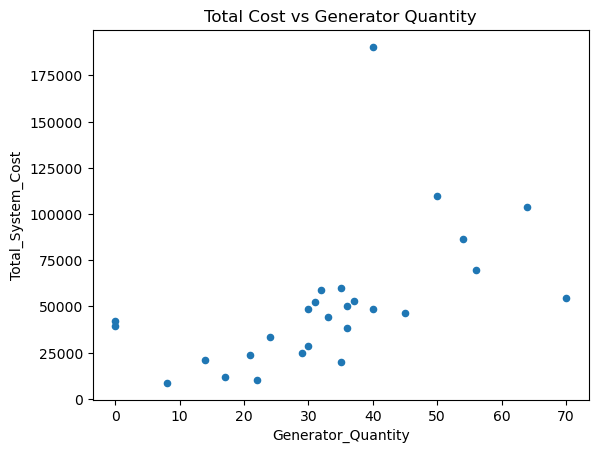

In [214]:
zip_filtered.plot(kind='scatter', x='Generator_Quantity', y='Total_System_Cost')
plt.title('Total Cost vs Generator Quantity')

Text(0.5, 1.0, 'Total Cost vs Inverter Quantity')

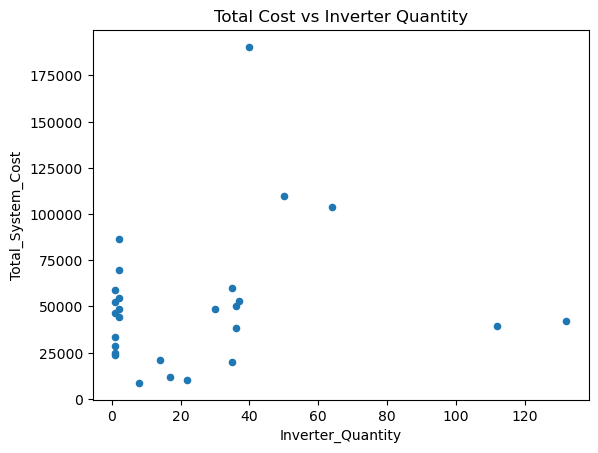

In [215]:
zip_filtered.plot(kind='scatter', x='Inverter_Quantity', y='Total_System_Cost')
plt.title('Total Cost vs Inverter Quantity')

In [216]:
installer_df = zip_filtered.groupby('Installer_Name')['Total_System_Cost'].mean().to_frame().reset_index()
installer_df.head(20)


,Installer_Name,Total_System_Cost
0,Other,57809.919375
1,Self-installed,14000.000000
2,Smart Energy,70000.000000
3,Sunrun,61332.950000
4,West Coast Solar,40211.250000


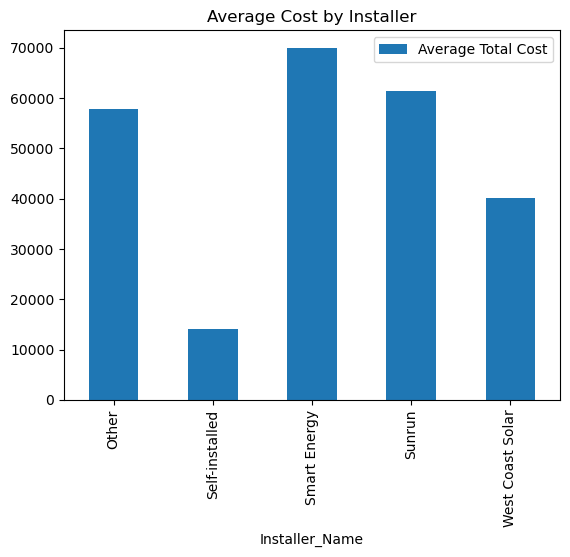

In [217]:
installer_df.plot(kind='bar', x='Installer_Name', y='Total_System_Cost')
plt.title('Average Cost by Installer')
plt.legend(['Average Total Cost'])
plt.show()

# Import and merge all datasets

In [218]:
#create a function to import dataframe files
def ImportDataset(utility):
    filepath = f"../clean_data/df_{utility}.csv"
    df = pd.read_csv(filepath)
    return df

In [219]:
# Import and merge all dataframes together to later create visualizations
pge_df = ImportDataset('PGE')
sce_df = ImportDataset('SCE')
sdge_df = ImportDataset('SDGE')
merged_df = pd.concat([pge_df, sce_df, sdge_df], ignore_index=True)
merged_df.shape

(871892, 19)

In [220]:
merged_df.head()

,Utility,Service_City,Service_Zip,Service_County,Technology_Type,System_Size_AC,Storage_Size_kW_AC,Inverter_Size_kW_AC,Mounting_Method,App_Received_Date,Installer_Name,Third_Party_Owned,Electric_Vehicle,Total_System_Cost,Generator_Manufacturer,Inverter_Manufacturer,Generator_Quantity,Inverter_Quantity,Year
0,PGE,KNIGHTSEN,94548.0,CONTRA COSTA,Solar,2.827,0.0,4.93,Rooftop,2018-10-17,Self-installed,No,No,12000.0,Suntech Power,Enphase,17.0,17.0,2018
1,PGE,STONYFORD,95979.0,COLUSA,Solar,6.845,0.0,6.50,Other,2018-05-20,Other,No,No,30000.0,Other,Altenergy,25.0,13.0,2018
2,PGE,DANVILLE,94506.0,CONTRA COSTA,Solar,12.651,0.0,17.64,Other,2019-08-07,Sky Power,No,No,55200.0,SunPower,SunPower,56.0,56.0,2019
3,PGE,ARROYO GRANDE,93420.0,SAN LUIS OBISPO,Solar,4.768,0.0,5.00,Rooftop,2019-07-15,Self-installed,No,Yes,20000.0,SolarWorld,SMA America,18.0,1.0,2019
4,PGE,ROCKLIN,95765.0,PLACER,Solar,2.710,0.0,2.88,Rooftop,2019-01-17,SunPower,No,No,12814.0,SunPower,SunPower,9.0,9.0,2019


In [221]:
#double check other utilities are in df
merged_df.loc[merged_df.Utility=='SCE']

,Utility,Service_City,Service_Zip,Service_County,Technology_Type,System_Size_AC,Storage_Size_kW_AC,Inverter_Size_kW_AC,Mounting_Method,App_Received_Date,Installer_Name,Third_Party_Owned,Electric_Vehicle,Total_System_Cost,Generator_Manufacturer,Inverter_Manufacturer,Generator_Quantity,Inverter_Quantity,Year
355991,SCE,DAGGETT,92327.0,San Bernardino,Solar,137.210,0.0,4.929034,Other,2019-01-15,Shorebreak,Yes,No,1.653333e+06,SolarWorld,SMA America,508.0,6.0,2019
355992,SCE,MONROVIA,91016.0,Los Angeles,Solar,6.903,0.0,4.929034,Rooftop,2020-01-23,Infinity Energy,No,No,4.125800e+04,Longi Green Energy,SolarEdge,25.0,1.0,2020
355993,SCE,STRATHMORE,93267.0,Tulare,Solar,8.640,0.0,4.929034,Rooftop,2020-08-18,Semper,No,No,4.250000e+04,Sanyo,SolarEdge,16.0,1.0,2020
355994,SCE,LINDSAY,93247.0,Tulare,Solar,13.975,0.0,4.929034,Rooftop,2020-09-14,Other,No,No,3.995000e+04,Other,Fronius,22.0,1.0,2020
355995,SCE,SANTA CLARITA,91390.0,Los Angeles,Solar,14.472,0.0,4.929034,Rooftop,2020-08-31,Other,No,No,3.900000e+04,Other,Enphase,50.0,50.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703344,SCE,VISALIA,93292.0,Tulare,"Solar, Storage",6.152,6.0,4.929034,Rooftop,2023-12-20,SunPower,Yes,No,2.708694e+05,Other,Enphase,18.0,17.0,2023
703345,SCE,BEAUMONT,92223.0,Riverside,"Solar, Storage",7.600,6.0,4.929034,Rooftop,2023-12-20,SunPower,Yes,No,2.210943e+05,Other,Enphase,22.0,21.0,2023
703346,SCE,ROWLAND HEIGHTS,91748.0,Los Angeles,"Solar, Storage",13.454,6.0,4.929034,Rooftop,2023-12-20,SunPower,Yes,No,4.699512e+05,Hanwha,Enphase,42.0,41.0,2023
703347,SCE,TWENTYNINE PALMS,92277.0,San Bernardino,Solar,3.289,0.0,4.929034,Rooftop,2023-12-20,Other,Yes,No,6.868570e+04,CSI,SolarEdge,9.0,1.0,2023


# Average Cost per Utility

In [222]:
#groupby utility and calculate the average total cost
cost_utility = merged_df.groupby('Utility')['Total_System_Cost'].mean().to_frame().reset_index()

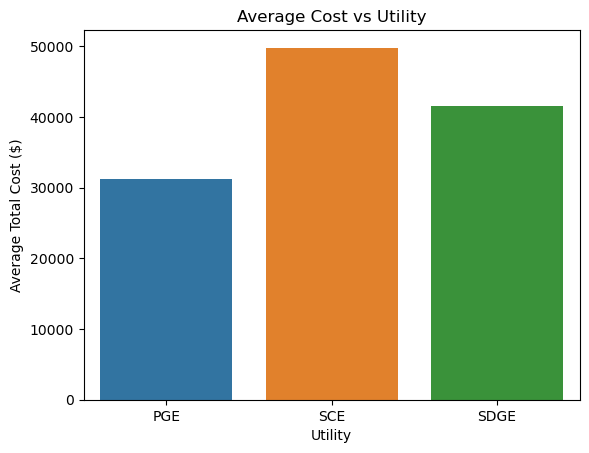

In [223]:
sns.barplot(x='Utility', y='Total_System_Cost', data=cost_utility)
plt.ylabel('Average Total Cost ($)')
plt.title('Average Cost vs Utility')
plt.show()

In [224]:
#export graphic

# Avg cost vs city

In [225]:
cost_city =  merged_df.groupby('Service_City')['Total_System_Cost'].mean().to_frame().reset_index().sort_values(by='Total_System_Cost').iloc[:10]
cost_city.head(10)

,Service_City,Total_System_Cost
608,Lodi,7024.370000
606,Lancaster,7500.000000
161,CANYON,8000.000000
1042,San Pablo,8910.000000
839,PRUNEDALE,9185.200000
318,EL DORADO HLS,10418.333333
882,RIO NIDO,10700.000000
321,EL MIRAGE,11666.666667
794,PETROLIA,11765.405000
690,Marina,12480.000000


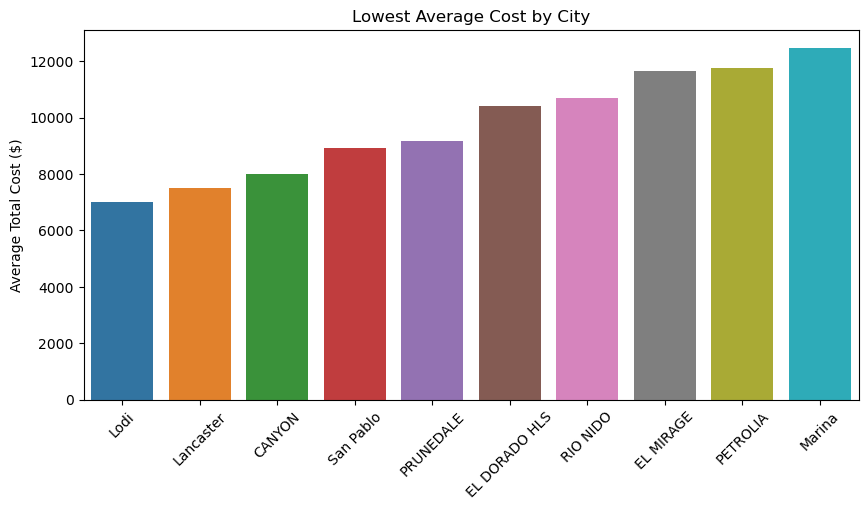

In [226]:
plt.figure().set_figwidth(10)
sns.barplot(x='Service_City', y='Total_System_Cost', data=cost_city)
plt.ylabel('Average Total Cost ($)')
plt.xlabel('')
plt.xticks(rotation=45, verticalalignment='top')
plt.title('Lowest Average Cost by City')
plt.show()

# AVG Cost vs Most popular Installers

In [227]:
cost_installer =  df.groupby("Installer_Name").agg(
    avg_cost=pd.NamedAgg(column="Total_System_Cost", aggfunc="mean"),
    installer_count=pd.NamedAgg(column="Installer_Name", aggfunc="count")
).reset_index()

bubble_chart = cost_installer.loc[(cost_installer['installer_count']>500)&(cost_installer['Installer_Name']!='Other')]

bar_chart = cost_installer.loc[cost_installer['Installer_Name']!='Other'].sort_values(by='installer_count', ascending=False).iloc[:5]

bar_chart.shape
# bubble_chart.shape

(5, 3)

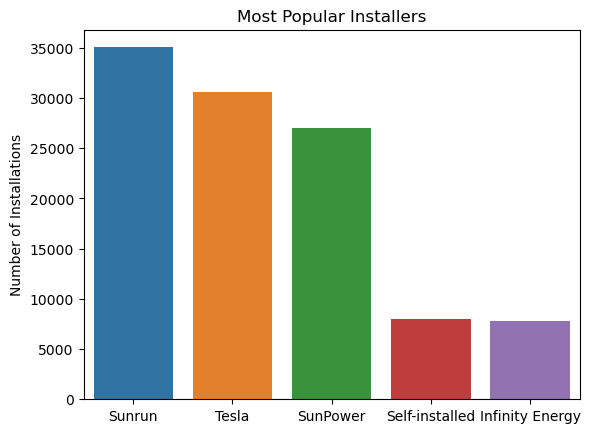

In [228]:
sns.barplot(x='Installer_Name', y='installer_count', data=bar_chart)
plt.ylabel('Number of Installations')
plt.xlabel('')
plt.title('Most Popular Installers')
plt.show()

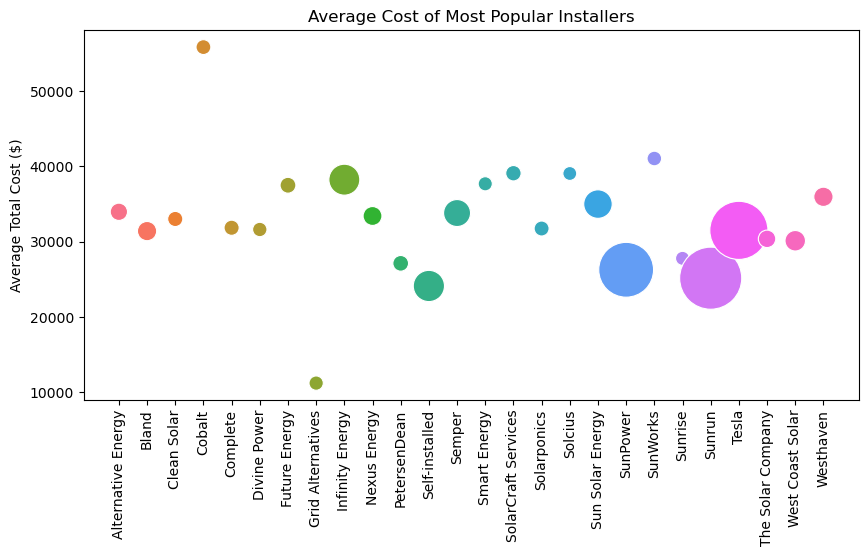

In [229]:
plt.figure().set_figwidth(10)
sns.scatterplot(data=bubble_chart, x="Installer_Name", y="avg_cost", size="installer_count", hue="Installer_Name", sizes=(100, 2000), legend=False)
plt.xticks(rotation=90)
plt.ylabel('Average Total Cost ($)')
plt.xlabel('')
plt.title('Average Cost of Most Popular Installers')
plt.show()